In [2]:
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cuda'
model_path='weights/icon_detect/model.pt'

som_model = get_yolo_model(model_path)

som_model.to(device)
print('model to {}'.format(device))

model to cuda


In [3]:
# two choices for caption model: fine-tuned blip2 or florence2
import importlib
# import util.utils
# importlib.reload(utils)
from util.utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-base-ft:
- modeling_florence2.py
. Make s

In [4]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [7]:
# reload utils
import importlib
import utils
importlib.reload(utils)
# from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

image_path = 'imgs/google_page.png'
image_path = 'imgs/windows_home.png'
image_path = "imgs/ws/5.png"
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
# image_path = 'imgs/word.png'
# image_path = 'imgs/excel2.png'

image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)

box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time() 

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time() 


image size: (2560, 1440)

0: 736x1280 9 icons, 98.0ms
Speed: 29.2ms preprocess, 98.0ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 7 5
time to get parsed content: 0.3349463939666748


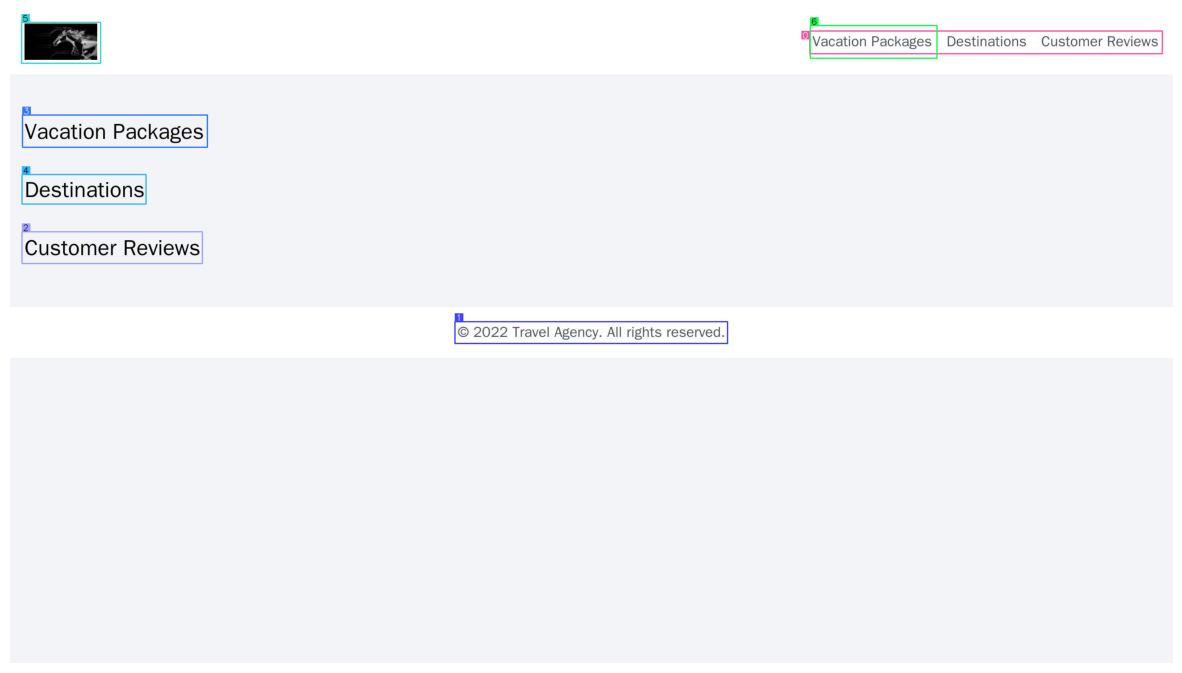

In [8]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
# print(len(parsed_content_list))


In [9]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,source,ID
0,text,"[0.6875, 0.03333333507180214, 0.99062502384185...",False,Vacation Packages Destinations Customer Reviews,box_ocr_content_ocr,0
1,text,"[0.3824218809604645, 0.47777777910232544, 0.61...",False,2022 Travel Agency. All rights reserved.,box_ocr_content_ocr,1
2,icon,"[0.010444569401443005, 0.34080636501312256, 0....",True,Customer Reviews,box_yolo_content_ocr,2
3,icon,"[0.01072237454354763, 0.16198164224624634, 0.1...",True,Vacation Packages,box_yolo_content_ocr,3
4,icon,"[0.010525810532271862, 0.2533667981624603, 0.1...",True,Destinations,box_yolo_content_ocr,4
5,icon,"[0.01009459514170885, 0.020207585766911507, 0....",True,Plant,box_yolo_content_yolo,5
6,icon,"[0.6878972053527832, 0.025096110999584198, 0.7...",True,Vaultor Pages,box_yolo_content_yolo,6


In [10]:
parsed_content_list

[{'type': 'text',
  'bbox': [0.6875,
   0.03333333507180214,
   0.9906250238418579,
   0.06805555522441864],
  'interactivity': False,
  'content': 'Vacation Packages Destinations Customer Reviews',
  'source': 'box_ocr_content_ocr'},
 {'type': 'text',
  'bbox': [0.3824218809604645,
   0.47777777910232544,
   0.6167968511581421,
   0.5111111402511597],
  'interactivity': False,
  'content': ' 2022 Travel Agency. All rights reserved.',
  'source': 'box_ocr_content_ocr'},
 {'type': 'icon',
  'bbox': [0.010444569401443005,
   0.34080636501312256,
   0.16548781096935272,
   0.38901591300964355],
  'interactivity': True,
  'content': 'Customer Reviews ',
  'source': 'box_yolo_content_ocr'},
 {'type': 'icon',
  'bbox': [0.01072237454354763,
   0.16198164224624634,
   0.16978856921195984,
   0.21154853701591492],
  'interactivity': True,
  'content': 'Vacation Packages ',
  'source': 'box_yolo_content_ocr'},
 {'type': 'icon',
  'bbox': [0.010525810532271862,
   0.2533667981624603,
   0.116939

In [11]:
import json
# Lưu vào file JSON
with open("5.json", "w", encoding="utf-8") as f:
    json.dump(parsed_content_list, f, indent=4, ensure_ascii=False)